In [1]:
import sys
import matplotlib
if 'matplotlib.pyplot' not in sys.modules.keys():
    matplotlib.use("Agg")
import matplotlib.pyplot as plt
import json
import numpy as np

%matplotlib notebook

########################################################################
## Files in Main Directory  
################################################################
path = "./"
#file_name = "./Boblet7_115_2_Decom_9MSource_Flight_D3D4_10_24_19.txt"
#file_name = "./Boblet6_230_4_Decom_9MSource_Flight_D3D4_10_24_19.txt"
#file_name = "./test_data_w:buffer(1).txt"
#file_name = "./test_data_w:buffer(2).txt"
#file_name = "./test_data_w:buffer(3).txt"
file_name = "data_file_230k.txt"
#file_name = "dataFile_shield15-Sep14.txt"
#file_name = "data_file_230k-run1.txt"
########################################################################

######################################################################
## Files in Specific Test Directories 
################################################################
path = "./shield_tests/shield_15/GPS_Interrupt_Develop/"
##### Files from GPS Interrupt Handling Development  #####

### Sept 18 ###
file_name = "data_file_230k-All_Interupts-09_18_2020.txt"
file_name = "data_file_230k-All_Interupts-09_18_2020-run2.txt"

### Sept 17 ###
#file_name = "data_file_230k-GPS_Barium_2.txt"
#file_name = "dataFile_230k-Barium_GPS_1s.txt"
#file_name = "data_file_230k-Barium_GPS_1s.txt"
#file_name = "data_file_230k-Barium_GPS_1s-run2.txt"
#file_name = "data_file_230k-Barium_GPS_mod_dt-run1.txt" #Bad Rpt Data
#file_name = "data_file_230k-Barium_GPS_mod_dt-run2.txt"

### Sept 16 ###
#file_name = "data_file_230k-GPS_inter2.txt"
##file_name = "data_file_230k-no_GPS2.txt"
#file_name = "data_file_230k-noGPS_BariumInter1.txt"
#file_name = "data_file_230k-GPS_BariumInter_1.txt"


#path ="./data_files/"
#### Files in data_files Directory ####
#file_name = "data_file_230k.txt"
#file_name ="data_file_230k-FirstInterupt.txt"
#path = "./dataFiles/"
#file_name = "dataFile_shield15-NoInter.txt"
#file_name = "dataFile_shield15-Inter_2s.txt"
########################################################################

######################################################################
## Other #############################################################
#file_name = "dataFile_shield15.txt"
######################################################################

dataFile = path + file_name

class IMUData():
    def __init__(self):

        self.time = []; self.temp = []
        self.ax = []; self.ay = []; self.az = []
        self.mx = []; self.my = []; self.mz = []
        self.gx = []; self.gy = []; self.gz = []
        
        self.timeRpt = []; self.tempRpt = []
        self.axRpt = []; self.ayRpt = []; self.azRpt = []
        self.mxRpt = []; self.myRpt = []; self.mzRpt = []
        self.gxRpt = []; self.gyRpt = []; self.gzRpt = []
        
class SweepData():
    def __init__(self):
        self.time = []
        self.pip0 = []; self.pip1 = [];
        
        self.timeRpt = []
        self.pip0Rpt = []; self.pip1Rpt = [];
        
class PayloadData():
    def __init__(self):
        self.rawData = ''
        self.imu = IMUData()
        self.sweeps = SweepData()
        self.macAddress = ''
        self.rssiData = []
        self.shieldID = 0
        
# Functions for merging bytes
def combine2(a, b):
    return (a << 8) | b
def combine4(a, b, c, d):
    return (a << 24) | (b << 16) | (c << 8) | d

# Functions for saving data
def convertDataToLists(dataSet):
    dataSet.imu.ax = dataSet.imu.ax.tolist()
    dataSet.imu.ay = dataSet.imu.ay.tolist()
    dataSet.imu.az = dataSet.imu.az.tolist()
    dataSet.imu.mx = dataSet.imu.mx.tolist()
    dataSet.imu.my = dataSet.imu.my.tolist()
    dataSet.imu.mz = dataSet.imu.mz.tolist()
    dataSet.imu.gx = dataSet.imu.gx.tolist()
    dataSet.imu.gy = dataSet.imu.gy.tolist()
    dataSet.imu.gz = dataSet.imu.gz.tolist()
    dataSet.imu.temp = dataSet.imu.temp.tolist()
    dataSet.imu.time = dataSet.imu.time.tolist()
    dataSet.sweeps.time = dataSet.sweeps.time.tolist()
    dataSet.sweeps.pip0 = dataSet.sweeps.pip0.tolist()
    dataSet.sweeps.pip1 = dataSet.sweeps.pip1.tolist()
    
    dataSet.imu.axRpt = dataSet.imu.axRpt.tolist()
    dataSet.imu.ayRpt = dataSet.imu.ayRpt.tolist()
    dataSet.imu.azRpt = dataSet.imu.azRpt.tolist()
    dataSet.imu.mxRpt = dataSet.imu.mxRpt.tolist()
    dataSet.imu.myRpt = dataSet.imu.myRpt.tolist()
    dataSet.imu.mzRpt = dataSet.imu.mzRpt.tolist()
    dataSet.imu.gxRpt = dataSet.imu.gxRpt.tolist()
    dataSet.imu.gyRpt = dataSet.imu.gyRpt.tolist()
    dataSet.imu.gzRpt = dataSet.imu.gzRpt.tolist()
    dataSet.imu.tempRpt = dataSet.imu.tempRpt.tolist()
    dataSet.imu.timeRpt = dataSet.imu.timeRpt.tolist()
    dataSet.sweeps.timeRpt = dataSet.sweeps.timeRpt.tolist()
    dataSet.sweeps.pip0Rpt = dataSet.sweeps.pip0Rpt.tolist()
    dataSet.sweeps.pip1Rpt = dataSet.sweeps.pip1Rpt.tolist()
    return dataSet

def makeJSONFile (fname, payloadData):
    f = open(fname, 'w')
    # Convert into lists and dictionaries for JSON storage
    payloadData = convertDataToLists(payloadData)
    JSONDict = {}
    # First the IMU data
    imu = payloadData.imu
    imuData = {"time":imu.time, "temp":imu.temp,
               "ax":imu.ax, "ay":imu.ay, "az":imu.az,
               "mx":imu.mx, "my":imu.my, "mz":imu.mz,
               "gx":imu.gx, "gy":imu.gy, "gz":imu.gz}
    JSONDict["imu"] = imuData
    # Then the sweep data
    sweeps = payloadData.sweeps
    sweepData = {"id":sweeps.payloadID, "time":sweeps.time, "pip0":sweeps.pip0, "pip1":sweeps.pip1}
    JSONDict["sweeps"] = sweepData

    json.dump(JSONDict, f)
    f.close()
    
# Functions for padding data

# padding time data as lists
def timefix(l, new, dt):   # l = time data as list, new = empty list, dt = delta t
    for t in l:
        if l.index(t) >= 2:
            # replace bad timewords
            if t - l[l.index(t) - 1] < 0 or t - l[l.index(t) - 1] > 1:
                l[l.index(t) - 1] = l[l.index(t) - 2] + dt
                t = l[l.index(t) - 1] + dt
            # if more than delta_t gap, fill in
            elif t - l[l.index(t) - 1] >= 2 * dt:
                new.append(l.index(t))
                l.insert(l.index(t), l[l.index(t) - 1] + dt)

# running through timewords and cleaning all mistakes from timefix
def clean(l, dt):    # l = same l data from timefix, dt = delta t
    i = 2
    cnt=0
    while i < len(l):
        if l[i] - l[i - 1] < 0 or l[i] - l[i - 1] > 1:
            l[i] = l[i - 1] + dt
            #Debugging
            #cnt += 1
            #print("Had to change!")
        else:
            i += 1
            #Debugging
            #cnt=0
        #Debugging
        #if cnt % 100000000 is 0 and cnt is not 0: print('Over %s loops for %s (i=%s)' %(cnt,l[i],i))

# padding pip data as arrays
def pad_data(original, new):  # original = non-time data array, new = same "new" list (now filled) from timefix
    NaN = np.nan
    if original is pip0 or original is pip1 or original is pip0Rpt or original is pip1Rpt:
        filler = np.full([1,28], NaN)
    else:
        filler = np.full([1,1], NaN)
    for data in new:
        one = np.split(original, [data])[0]
        two = np.split(original, [data])[1]
        original = np.vstack((one, filler, two))
    return original

In [2]:
########### Load the data file ###########
f = open(dataFile, 'r')
rawData = f.read()

# Create payload objects and store parsed data
mainPIPData = PayloadData()
mainPIPData.rawData = rawData
payloads = [mainPIPData]

########### Parse by data type for each payload ###########
strict_parse = True #False # Require a pound symbol at the end of the data
for payload in payloads:
    payloadrawData = payload.rawData
    imu = []
    sweeps = []
    imuRpt = []
    sweepsRpt = []
    interrupt = []
    # 2 PIPs with 28 2-byte samples + 4-byte timestamp + ID
    sweepSamples = 28
    numSweepBytes = sweepSamples * 2 * 2 + 4 + 1
    # 9 2-byte data points + 2-byte temp + 4-byte timestamp
    numIMUBytes = 24
    # Barium interrupt
    numInterruptBytes = 4
    
    pntr = 0
    while pntr < len(payloadrawData):
        # Check message start sentinels and not at end
        if payloadrawData[pntr] == '#' and (len(payloadrawData)-pntr) >= numIMUBytes:
            if payloadrawData[pntr+1] == 'I':
                # If not the last, check message end sentinel
                if pntr+2+numIMUBytes < len(payloadrawData):
                    if not strict_parse or payloadrawData[pntr+2+numIMUBytes] == '#':
                        imu.append(payloadrawData[pntr+2:pntr+2+numIMUBytes])
                # Or just add the last message
                else:
                    imu.append(payloadrawData[pntr+2:pntr+2+numIMUBytes])
                pntr += 1
            elif payloadrawData[pntr+1] == 'S':
                if  pntr+2+numSweepBytes < len(payloadrawData):
                    if not strict_parse or payloadrawData[pntr+2+numSweepBytes] == '#':
                        sweeps.append(payloadrawData[pntr+2:pntr+2+numSweepBytes])
                else:
                    sweeps.append(payloadrawData[pntr+2:pntr+2+numSweepBytes])
                pntr += 1
            elif payloadrawData[pntr+1] == 'J':
                if pntr+2+numIMUBytes < len(payloadrawData):
                    if not strict_parse or payloadrawData[pntr+2+numIMUBytes] == '#':
                        imuRpt.append(payloadrawData[pntr+2:pntr+2+numIMUBytes])
                else:
                    imuRpt.append(payloadrawData[pntr+2:pntr+2+numIMUBytes])
                pntr += 1
            elif payloadrawData[pntr+1] == 'T':
                if  pntr+2+numSweepBytes < len(payloadrawData):
                    if not strict_parse or payloadrawData[pntr+2+numSweepBytes] == '#':
                        sweepsRpt.append(payloadrawData[pntr+2:pntr+2+numSweepBytes])
                else:
                    sweepsRpt.append(payloadrawData[pntr+2:pntr+2+numSweepBytes])
                pntr += 1
            elif payloadrawData[pntr+1] == 'B':
                if  pntr+2+numInterruptBytes < len(payloadrawData):
                    if not strict_parse or payloadrawData[pntr+2+numInterruptBytes] == '#':
                        interrupt.append(payloadrawData[pntr+2:pntr+2+numInterruptBytes])
                else:
                    interrupt.append(payloadrawData[pntr+2:pntr+2+numInterruptBytes])
                pntr += 1
            else:
                pntr += 1
        else:
            pntr += 1
    print("Num IMU Messages: %s" %len(imu))
    print("Num Sweep Messages: %s" %len(sweeps))
    print("Num IMU Messages (buffer): %s" %len(imuRpt))
    print("Num Sweep Messages (buffer): %s" %len(sweepsRpt))
    print("Num interrupt messages: %s" %len(interrupt))

    ########### Build data structures ###########
    # First the IMU/IMU Buffer
    imuTime = [];
    ax = []; ay = []; az = []
    mx = []; my = []; mz = []
    gx = []; gy = []; gz = []
    temp = [];
    
    imuTimeRpt = [];
    axRpt = []; ayRpt = []; azRpt = []
    mxRpt = []; myRpt = []; mzRpt = []
    gxRpt = []; gyRpt = []; gzRpt = []
    tempRpt = [];
    
    for i in imu:
        if len(i) == numIMUBytes:
            imuTime.append(combine4(ord(i[3]), ord(i[2]), ord(i[1]), ord(i[0])))
            # The byte order is reversed, but the data sets are not
            ax.append(combine2(ord(i[5]), ord(i[4])))
            ay.append(combine2(ord(i[7]), ord(i[6])))
            az.append(combine2(ord(i[9]), ord(i[8])))
            mx.append(combine2(ord(i[11]), ord(i[10])))
            my.append(combine2(ord(i[13]), ord(i[12])))
            mz.append(combine2(ord(i[15]), ord(i[14])))
            gx.append(combine2(ord(i[17]), ord(i[16])))
            gy.append(combine2(ord(i[19]), ord(i[18])))
            gz.append(combine2(ord(i[21]), ord(i[20])))
            temp.append(combine2(ord(i[23]), ord(i[22])))
    
    for i in imuRpt:
        if len(i) == numIMUBytes:
            imuTimeRpt.append(combine4(ord(i[3]), ord(i[2]), ord(i[1]), ord(i[0])))
            axRpt.append(combine2(ord(i[5]), ord(i[4])))
            ayRpt.append(combine2(ord(i[7]), ord(i[6])))
            azRpt.append(combine2(ord(i[9]), ord(i[8])))
            mxRpt.append(combine2(ord(i[11]), ord(i[10])))
            myRpt.append(combine2(ord(i[13]), ord(i[12])))
            mzRpt.append(combine2(ord(i[15]), ord(i[14])))
            gxRpt.append(combine2(ord(i[17]), ord(i[16])))
            gyRpt.append(combine2(ord(i[19]), ord(i[18])))
            gzRpt.append(combine2(ord(i[21]), ord(i[20])))
            tempRpt.append(combine2(ord(i[23]), ord(i[22])))

    imuTime = np.array(imuTime, dtype='uint32')
    ax = np.array(ax, dtype='int16')
    ay = np.array(ay, dtype='int16')
    az = np.array(az, dtype='int16')
    mx = np.array(mx, dtype='int16')
    my = np.array(my, dtype='int16')
    mz = np.array(mz, dtype='int16')
    gx = np.array(gx, dtype='int16')
    gy = np.array(gy, dtype='int16')
    gz = np.array(gz, dtype='int16')
    temp = np.array(temp, dtype='int16')
    
    imuTimeRpt = np.array(imuTimeRpt, dtype='uint32')
    axRpt = np.array(axRpt, dtype='int16')
    ayRpt = np.array(ayRpt, dtype='int16')
    azRpt = np.array(azRpt, dtype='int16')
    mxRpt = np.array(mxRpt, dtype='int16')
    myRpt = np.array(myRpt, dtype='int16')
    mzRpt = np.array(mzRpt, dtype='int16')
    gxRpt = np.array(gxRpt, dtype='int16')
    gyRpt = np.array(gyRpt, dtype='int16')
    gzRpt = np.array(gzRpt, dtype='int16')
    tempRpt = np.array(tempRpt, dtype='int16')

    payload.imu.time = imuTime
    payload.imu.ax = ax
    payload.imu.ay = ay
    payload.imu.az = az
    payload.imu.mx = mx
    payload.imu.my = my
    payload.imu.mz = mz
    payload.imu.gx = gx
    payload.imu.gy = gy
    payload.imu.gz = gz
    payload.imu.temp = temp
    
    payload.imu.timeRpt = imuTimeRpt
    payload.imu.axRpt = axRpt
    payload.imu.ayRpt = ayRpt
    payload.imu.azRpt = azRpt
    payload.imu.mxRpt = mxRpt
    payload.imu.myRpt = myRpt
    payload.imu.mzRpt = mzRpt
    payload.imu.gxRpt = gxRpt
    payload.imu.gyRpt = gyRpt
    payload.imu.gzRpt = gzRpt
    payload.imu.tempRpt = tempRpt

    # Then the sweeps
    payloadID = [];
    sweepTime = []
    allSweepsPIP0 = []
    individualSweepsPIP0 = []
    allSweepsPIP1 = []
    individualSweepsPIP1 = []
    PIP0StartByte = 4 + 1                             # Four for time, one payload ID  
    PIP0StopByte = PIP0StartByte + sweepSamples*2   # Number of samples, two bytes each
    PIP1StopByte = PIP0StopByte + sweepSamples*2      # Number of samples, two bytes each
    
    sweepTimeRpt = []
    allSweepsPIP0Rpt = []
    individualSweepsPIP0Rpt = []
    allSweepsPIP1Rpt = []
    individualSweepsPIP1Rpt = []
    PIP0StartByteRpt = 4 + 1                             # Four for time, one payload ID  
    PIP0StopByteRpt = PIP0StartByteRpt + sweepSamples*2   # Number of samples, two bytes each
    PIP1StopByteRpt = PIP0StopByteRpt + sweepSamples*2      # Number of samples, two bytes each
    
    for i in sweeps:
        if len(i) == numSweepBytes:
            sweepTime.append(combine4(ord(i[3]), ord(i[2]), ord(i[1]), ord(i[0])))
            payloadID.append(ord(i[4]))
            tempSweep = []
            for byte in xrange(PIP0StartByte,PIP0StopByte,2):
                allSweepsPIP0.append(combine2(ord(i[byte+1]), ord(i[byte])))
                tempSweep.append(combine2(ord(i[byte+1]), ord(i[byte])))
            individualSweepsPIP0.append(tempSweep)
            tempSweep = []
            for byte in xrange(PIP0StopByte,PIP1StopByte,2):
                allSweepsPIP1.append(combine2(ord(i[byte+1]), ord(i[byte])))
                tempSweep.append(combine2(ord(i[byte+1]), ord(i[byte])))
            individualSweepsPIP1.append(tempSweep)
            
    for i in sweepsRpt:
        if len(i) == numSweepBytes:
            sweepTimeRpt.append(combine4(ord(i[3]), ord(i[2]), ord(i[1]), ord(i[0])))
            tempSweepRpt = []
            for byte in xrange(PIP0StartByteRpt,PIP0StopByteRpt,2):
                allSweepsPIP0Rpt.append(combine2(ord(i[byte+1]), ord(i[byte])))
                tempSweepRpt.append(combine2(ord(i[byte+1]), ord(i[byte])))
            individualSweepsPIP0Rpt.append(tempSweepRpt)
            tempSweepRpt = []
            for byte in xrange(PIP0StopByteRpt,PIP1StopByteRpt,2):
                allSweepsPIP1Rpt.append(combine2(ord(i[byte+1]), ord(i[byte])))
                tempSweepRpt.append(combine2(ord(i[byte+1]), ord(i[byte])))
            individualSweepsPIP1Rpt.append(tempSweepRpt)
            
    interruptTime = []        
    for i in interrupt:
        if len(i) == numInterruptBytes:
            interruptTime.append(combine4(ord(i[3]), ord(i[2]), ord(i[1]), ord(i[0])))
                       
    payloadMatch = (len(set(payloadID)) == 1)
    if payloadMatch:
        print("Payload ID's match. This was payload #%s." %payloadID[0])
    else:
        print("Payload ID's don't match. Something went wrong...")
        
    sweepTime = np.array(sweepTime, dtype='uint32')
    individualSweepsPIP0 = np.array(individualSweepsPIP0, dtype='int16')
    individualSweepsPIP1 = np.array(individualSweepsPIP1, dtype='int16')
    payload.shieldID = payloadID[0]
    payload.sweeps.time = sweepTime
    payload.sweeps.pip0 = individualSweepsPIP0
    payload.sweeps.pip1 = individualSweepsPIP1
    
    sweepTimeRpt = np.array(sweepTimeRpt, dtype='uint32')
    individualSweepsPIP0Rpt = np.array(individualSweepsPIP0Rpt, dtype='int16')
    individualSweepsPIP1Rpt = np.array(individualSweepsPIP1Rpt, dtype='int16')
    payload.sweeps.timeRpt = sweepTimeRpt
    payload.sweeps.pip0Rpt = individualSweepsPIP0Rpt
    payload.sweeps.pip1Rpt = individualSweepsPIP1Rpt

Num IMU Messages: 10191
Num Sweep Messages: 10189
Num IMU Messages (buffer): 10192
Num Sweep Messages (buffer): 10191
Num interrupt messages: 500
Payload ID's match. This was payload #15.


In [3]:
################################## Forming and Scaling Data ##################################### 
debug=True
sweepSize = 28
sweepStepDt = 0.02 / sweepSize

# Define as None for no limits
timeMin = None # 485 produces better plots than 480
timeMax = None

# Set by the time limits automatically
timesToSkip = 30 # To impove the quality of sample numbering selection
IMUSampleMin = None
IMUSampleMax = None
SweepSampleMin = None
SweepSampleMax = None

loop_cnt = 1
for payload in payloads:
    print('Payload #%s' %loop_cnt)
    loop_cnt = loop_cnt+1
    # Extract data from each set, cast into arrays
    aScale = 4*9.8; mScale = 1.; gScale = 2000./360
    
    imuTime = np.array(payload.imu.time)/1.E6;
    sweepTime = np.array(payload.sweeps.time)/1.E6
    
    imuTimeRpt = np.array(payload.imu.timeRpt)/1.E6;
    sweepTimeRpt = np.array(payload.sweeps.timeRpt)/1.E6
    
    # Figure out what the sample bounds should be
    if timeMin:
        IMUSampleMin = np.where(imuTime>=timeMin)[0][timesToSkip]
        IMUSampleMax = np.where(imuTime<=timeMax)[0][-1 * timesToSkip]
        SweepSampleMin = np.where(sweepTime>=timeMin)[0][timesToSkip]
        SweepSampleMax = np.where(sweepTime<=timeMax)[0][-1 * timesToSkip]
    imuTime = imuTime[IMUSampleMin:IMUSampleMax]
    sweepTime = sweepTime[SweepSampleMin:SweepSampleMax]
     
    # Make everything an array
    interruptArray = np.array(interruptTime)/10**6
    
    temp = payload.imu.temp[IMUSampleMin:IMUSampleMax];
    ax = np.array(payload.imu.ax[IMUSampleMin:IMUSampleMax])*aScale/2**15
    ay = np.array(payload.imu.ay[IMUSampleMin:IMUSampleMax])*aScale/2**15
    az = np.array(payload.imu.az[IMUSampleMin:IMUSampleMax])*aScale/2**15
    mx = np.array(payload.imu.mx[IMUSampleMin:IMUSampleMax])*mScale/2**15
    my = np.array(payload.imu.my[IMUSampleMin:IMUSampleMax])*mScale/2**15
    mz = np.array(payload.imu.mz[IMUSampleMin:IMUSampleMax])*mScale/2**15
    gx = np.array(payload.imu.gx[IMUSampleMin:IMUSampleMax])*gScale/2**15
    gy = np.array(payload.imu.gy[IMUSampleMin:IMUSampleMax])*gScale/2**15
    gz = np.array(payload.imu.gz[IMUSampleMin:IMUSampleMax])*gScale/2**15
    shieldID = payload.shieldID
    pip0 = np.array(payload.sweeps.pip0)*5./2**14
    pip1 = np.array(payload.sweeps.pip1)*5./2**14
    
    tempRpt = payload.imu.tempRpt[IMUSampleMin:IMUSampleMax];
    axRpt = np.array(payload.imu.axRpt[IMUSampleMin:IMUSampleMax])*aScale/2**15
    ayRpt = np.array(payload.imu.ayRpt[IMUSampleMin:IMUSampleMax])*aScale/2**15
    azRpt = np.array(payload.imu.azRpt[IMUSampleMin:IMUSampleMax])*aScale/2**15
    mxRpt = np.array(payload.imu.mxRpt[IMUSampleMin:IMUSampleMax])*mScale/2**15
    myRpt = np.array(payload.imu.myRpt[IMUSampleMin:IMUSampleMax])*mScale/2**15
    mzRpt = np.array(payload.imu.mzRpt[IMUSampleMin:IMUSampleMax])*mScale/2**15
    gxRpt = np.array(payload.imu.gxRpt[IMUSampleMin:IMUSampleMax])*gScale/2**15
    gyRpt = np.array(payload.imu.gyRpt[IMUSampleMin:IMUSampleMax])*gScale/2**15
    gzRpt = np.array(payload.imu.gzRpt[IMUSampleMin:IMUSampleMax])*gScale/2**15
    pip0Rpt = np.array(payload.sweeps.pip0Rpt)*5./2**14
    pip1Rpt = np.array(payload.sweeps.pip1Rpt)*5./2**14
    
############################ Padding Data #######################################

    # Change time data to list form for padding
    imuList = imuTime.tolist()
    sweepList = sweepTime.tolist()
    
    imuListRpt = imuTimeRpt.tolist()
    sweepListRpt = sweepTimeRpt.tolist()
    
    # Find correct delta t
    imuDelt = round(((imuList[2000] - imuList[1000]) / 1000), 4)
    sweepDelt = round(((sweepList[2000] - sweepList[1000]) / 1000), 4)
    
    imuDeltRpt = round(((imuListRpt[1000] - imuListRpt[100]) / 900), 4)
    sweepDeltRpt = round(((sweepListRpt[1000] - sweepListRpt[100]) / 900), 4)
    
    newImuTime =  []
    newSweepTime = []
    
    newImuTimeRpt =  []
    newSweepTimeRpt = []
    
    # iterate through IMU twice to better fill gaps
    timefix(imuList, newImuTime, imuDelt)
    timefix(imuList, newImuTime, imuDelt)
    clean(imuList, imuDelt)
    #if not debug:
    timefix(imuListRpt, newImuTimeRpt, imuDeltRpt)
    timefix(imuListRpt, newImuTimeRpt, imuDeltRpt)
    clean(imuListRpt, imuDeltRpt)

    # iterate through sweep
    timefix(sweepList, newSweepTime, sweepDelt)
    timefix(sweepList, newSweepTime, sweepDelt)
    clean(sweepList, sweepDelt)

    timefix(sweepListRpt, newSweepTimeRpt, sweepDeltRpt)
    timefix(sweepListRpt, newSweepTimeRpt, sweepDeltRpt)
    clean(sweepListRpt, sweepDeltRpt)

    # change back to array
    imuList = np.array(imuList)
    sweepList = np.array(sweepList)

    imuListRpt = np.array(imuListRpt)
    sweepListRpt = np.array(sweepListRpt)

    # reshape all data
    ax = np.reshape(ax, (len(ax), 1))
    ay = np.reshape(ay, (len(ay), 1))
    az = np.reshape(az, (len(az), 1))
    gx = np.reshape(gx, (len(gx), 1))
    gy = np.reshape(gy, (len(gy), 1))
    gz = np.reshape(gz, (len(gz), 1))
    mx = np.reshape(mx, (len(mx), 1))
    my = np.reshape(my, (len(my), 1))
    mz = np.reshape(mz, (len(mz), 1))
    temp = np.reshape(temp, (len(temp), 1))

    axRpt = np.reshape(axRpt, (len(axRpt), 1))
    ayRpt = np.reshape(ayRpt, (len(ayRpt), 1))
    azRpt = np.reshape(azRpt, (len(azRpt), 1))
    gxRpt = np.reshape(gxRpt, (len(gxRpt), 1))
    gyRpt = np.reshape(gyRpt, (len(gyRpt), 1))
    gzRpt = np.reshape(gzRpt, (len(gzRpt), 1))
    mxRpt = np.reshape(mxRpt, (len(mxRpt), 1))
    myRpt = np.reshape(myRpt, (len(myRpt), 1))
    mzRpt = np.reshape(mzRpt, (len(mzRpt), 1))
    tempRpt = np.reshape(tempRpt, (len(tempRpt), 1))

    # pad non-time data
    ax = pad_data(ax, newImuTime)
    ay = pad_data(ay, newImuTime)
    az = pad_data(az, newImuTime)
    mx = pad_data(mx, newImuTime)
    my = pad_data(my, newImuTime)
    mz = pad_data(mz, newImuTime)
    gx = pad_data(gx, newImuTime)
    gy = pad_data(gy, newImuTime)
    gz = pad_data(gz, newImuTime)
    temp = pad_data(temp, newImuTime)
    pip0 = pad_data(pip0, newSweepTime)
    pip1 = pad_data(pip1, newSweepTime)

    axRpt = pad_data(axRpt, newImuTimeRpt)
    ayRpt = pad_data(ayRpt, newImuTimeRpt)
    azRpt = pad_data(azRpt, newImuTimeRpt)
    mxRpt = pad_data(mxRpt, newImuTimeRpt)
    myRpt = pad_data(myRpt, newImuTimeRpt)
    mzRpt = pad_data(mzRpt, newImuTimeRpt)
    gxRpt = pad_data(gxRpt, newImuTimeRpt)
    gyRpt = pad_data(gyRpt, newImuTimeRpt)
    gzRpt = pad_data(gzRpt, newImuTimeRpt)
    tempRpt = pad_data(tempRpt, newImuTimeRpt)
    pip0Rpt = pad_data(pip0Rpt, newSweepTimeRpt)
    pip1Rpt = pad_data(pip1Rpt, newSweepTimeRpt)

    print("Done")
    print("Length of IMUList is " + str(len(imuList)))
    print("Length of sweepList is " + str(len(sweepList)))
    print("Length of IMUList (buffer) is " + str(len(imuListRpt)))
    print("Length of sweepList (buffer) is " + str(len(sweepListRpt)))
    print("Number of interupt times is "+str(len(set(interruptArray)))) #MLM: Added to provide indication of behavior of interrupt data

    interruptValue = (len(set(interruptArray)) == 1)
    if interruptValue and len(interruptArray) > 100:
        print("Time of interrupt is at " + str(interruptArray[0]) + " seconds.")
    else:
        print("Something wrong. Interrupt time doesn't make sense.")

Payload #1
Done
Length of IMUList is 10208
Length of sweepList is 10357
Length of IMUList (buffer) is 10209
Length of sweepList (buffer) is 10346
Number of interupt times is 1
Time of interrupt is at 103 seconds.


In [28]:
#file_name = "data_file_230k-GPS_BariumInter_1.txt"
print 'Good Data! '
print 'imuList: %s; imuListRpt: %s' % (np.array(imuList), np.array(imuListRpt))

Good Data! 
imuList: [11.0495   11.074144 11.096348 ... 89.05646  89.078644 89.100864]; imuListRpt: [ 0.979748  1.001948  1.024148 ... 78.977664 78.999848 79.022064]


In [24]:
#file_name = "data_file_230k-GPS_Barium_2.txt"
print 'Good Data? '
print 'imuList: %s; imuListRpt: %s' % (np.array(imuList), np.array(imuListRpt))

Good Data? 
imuList: [20.909404 20.934056 20.956256 ... 76.533268 76.555456 76.577656]; imuListRpt: [10.897408 10.922068 10.944256 ... 66.521156 66.543368 66.565556]


In [20]:
#file_name = "dataFile_230k-Barium_GPS_1s.txt"
print 'None-Realtime Plotter '
print 'imuList: %s; imuListRpt: %s' % (np.array(imuList), np.array(imuListRpt))

None-Realtime Plotter 
imuList: [11.046104 11.070756 11.092972 ... 71.030756 71.052972 71.075168]; imuListRpt: [215.747805 215.682266 215.81334  ... 215.682269 215.682267 215.813341]


In [16]:
#file_name = "data_file_230k-Barium_GPS_1s.txt"
print 'Realtime Plotter '
print 'imuList: %s; imuListRpt: %s' % (np.array(imuList), np.array(imuListRpt))

Realtime Plotter 
imuList: [14.341556 14.363756 14.385956 ... 87.563656 87.585856 87.608056]; imuListRpt: [215.747802 215.878877 215.747804 ... 215.81334  215.747805 215.682265]


In [34]:
#file_name = "data_file_230k-Barium_GPS_1s-run2.txt"
print 'Another Realtime Plotter '
print 'imuList: %s; imuListRpt: %s, imuListRpt Extrema: %s' % (np.array(imuList), np.array(imuListRpt), np.any(216.<=np.array(imuListRpt)))

Another Realtime Plotter 
imuList: [12.607568 12.629772 12.651956 ... 85.983852 86.006552 86.029252]; imuListRpt: [215.813341 215.682266 215.747802 ... 215.682265 215.813341 215.81334 ], imuListRpt >= 216: True


In [38]:
#t - l[l.index(t) - 1] < 0
t=imuListRpt[0]
print imuListRpt[0]
print imuListRpt[1]
imuListRpt.index(t)
l=imuListRpt
dt=imuDeltRpt
repeat_dct = dict()
repeat_lst = []
unique_lst = []
for t in l:
    cnt = 0
    if l.index(t) >= 2:
        repeat_lst.append(t)
        repeat_dct[t] = l.count(t)
        #repeat_lst.append((t,l.index(t)))
    else:
        unique_lst.append(t)
#        # replace bad timewords
 #       if t - l[l.index(t) - 1] < 0 or t - l[l.index(t) - 1] > 1:
  #          l[l.index(t) - 1] = l[l.index(t) - 2] + dt
   #         t = l[l.index(t) - 1] + dt
    #    # if more than delta_t gap, fill in
     #   elif t - l[l.index(t) - 1] >= 2 * dt:
      #      new.append(l.index(t))
       #     l.insert(l.index(t), l[l.index(t) - 1] + dt)
        #else: 
         #   cnt += 1
        #if cnt > 10
print len(repeat_dct.keys())
print len(repeat_lst)
print len(unique_lst)
print len(l)
#num_repeats = [len(repeat_dct[key]) for key in repeat_dct.keys()]
#dct = {}
#for repeat in np.unique(num_repeats): dct[repeat]=[]
#for key in repeat_dct.keys(): dct[len(repeat_dct[key])].append(key)
repeat_dct
#l.count?

5.225472
5.247668


AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [44]:
# choose original or repeat
plottype = 'Original'
#plottype = 'Repeat'

if plottype == 'Original':
    imuPlot = imuList
    axPlot = ax
    ayPlot = ay
    azPlot = az
    gxPlot = gx
    gyPlot = gy
    gzPlot = gz
    mxPlot = mx
    myPlot = my
    mzPlot = mz
    tempPlot = temp
    sweepPlot = sweepList
    pip0Plot = pip0
    pip1Plot = pip1 
    
elif plottype == 'Repeat':
    imuPlot = imuListRpt
    axPlot = axRpt
    ayPlot = ayRpt
    azPlot = azRpt
    gxPlot = gxRpt
    gyPlot = gyRpt
    gzPlot = gzRpt
    mxPlot = mxRpt
    myPlot = myRpt
    mzPlot = mzRpt
    tempPlot = tempRpt
    sweepPlot = sweepListRpt
    pip0Plot = pip0Rpt
    pip1Plot = pip1Rpt

<IPython.core.display.Javascript object>


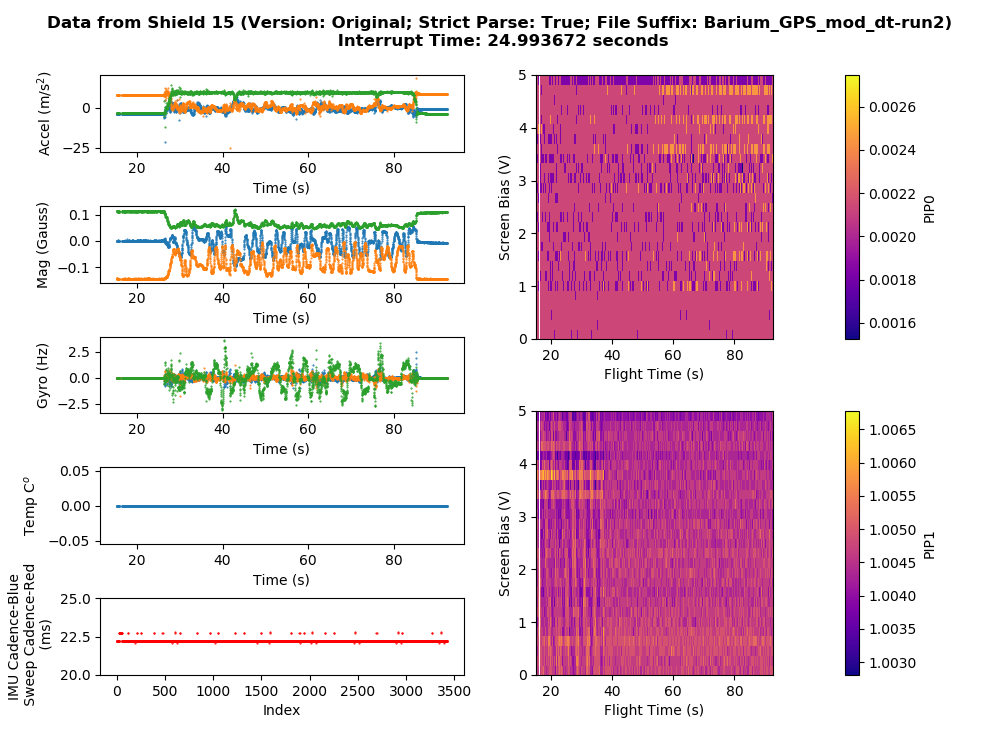

1/7 Done
2/7 Done
3/7 Done
4/7 Done
5/7 Done
6/7 Done
7/7 Done


In [49]:
matplotlib.use('nbagg')
import matplotlib.cm as cm
import scipy.signal as sig
from scipy.interpolate import interp1d
from scipy.io import savemat, loadmat
from __future__ import division

dots = True

gs_left = plt.GridSpec(5, 2,  hspace=0.7)

# Set up dots or not more cleanly
line_style = '-'
if dots:
    line_style = '.'

markersize = 1

fig = plt.figure(figsize=(10, 7.5))

# **plot IMU time vs IMU data**
axis = fig.add_subplot(gs_left[0,0])
plt.plot(imuPlot, axPlot, line_style, markersize=markersize) 
plt.plot(imuPlot, ayPlot, line_style, markersize=markersize)  
plt.plot(imuPlot, azPlot, line_style, markersize=markersize) 
plt.ylabel("Accel (m/s$^2$)")
#plt.ylim([-2, 2])                
plt.xticks(visible=True)
plt.xlabel("Time (s)")
print ("1/7 Done")

fig.add_subplot(gs_left[1,0], sharex=axis)
plt.plot(imuPlot, mxPlot, line_style, markersize=markersize) 
plt.plot(imuPlot, myPlot, line_style, markersize=markersize)  
plt.plot(imuPlot, mzPlot, line_style, markersize=markersize) 
plt.ylabel("Mag (Gauss)")
#plt.ylim([-0.3, 0.3])                 
plt.xticks(visible=True)
plt.xlabel("Time (s)")
print ("2/7 Done")

fig.add_subplot(gs_left[2,0], sharex=axis)
plt.plot(imuPlot, gxPlot, line_style, markersize=markersize) 
plt.plot(imuPlot, gyPlot, line_style, markersize=markersize)  
plt.plot(imuPlot, gzPlot, line_style, markersize=markersize) 
plt.ylabel("Gyro (Hz)")
#plt.ylim([-0.5, 0.5])                  
plt.xticks(visible=True)
plt.xlabel("Time (s)")
print ("3/7 Done")

fig.add_subplot(gs_left[3,0], sharex=axis)
plt.plot(imuPlot, tempPlot, line_style, markersize=markersize)
#plt.ylim([-1, 1])
plt.ylabel("Temp C$^o$")
plt.xlabel("Time (s)")
print ("4/7 Done")

fig.add_subplot(gs_left[4,0])
plt.plot(np.diff(imuPlot), line_style, color='blue', markersize=markersize)
plt.plot(np.diff(sweepPlot)*1E3, line_style, color='red', markersize=markersize)
plt.ylim([20,25])
#plt.xlim([650,1000])
plt.ylabel("IMU Cadence-Blue\n Sweep Cadence-Red\n (ms)")
plt.xlabel("Index")
print ("5/7 Done")

# **Plot sweep time vs sweep data (Color plots)**

# commands to reorient pip array to match with other axes
pip0_rot = np.rot90(pip0Plot, k=1, axes=(0, 1))
pip1_rot = np.rot90(pip1Plot, k=1, axes=(0, 1))

sweep_voltage = np.linspace(0,5,28)

line_style = '-'

ax1 = plt.subplot2grid((4,2),(0,1),rowspan = 2)
plt.pcolormesh(sweepPlot, sweep_voltage, pip0_rot, cmap='plasma', vmin = None, vmax = None)
#plt.ylim([0,2])
plt.xlim([sweepPlot[0],sweepPlot[-1]])
ax1.set_xlabel("Flight Time (s)")
ax1.set_ylabel("Screen Bias (V)")
cb = plt.colorbar(pad = 0.2)
cb.set_label("PIP0")
print ("6/7 Done")

ax1 = plt.subplot2grid((4,2),(2,1),rowspan = 2)
plt.pcolormesh(sweepPlot, sweep_voltage, pip1_rot, cmap='plasma', vmin = None, vmax = None)
#plt.ylim([0,2])
plt.xlim([sweepPlot[0],sweepPlot[-1]])
ax1.set_xlabel("Flight Time (s)")
ax1.set_ylabel("Screen Bias (V)")
cb = plt.colorbar(pad = 0.2)
cb.set_label("PIP1")
print ("7/7 Done")
        
# Adjust figure
fig.subplots_adjust(right=.90)
fig.subplots_adjust(left=0.10)
fig.subplots_adjust(top=0.90)
fig.subplots_adjust(bottom=0.10)
fig.subplots_adjust(hspace=0.75)

if interruptValue and len(interruptArray) > 100:
    interruptNum = str(interruptArray[0]) + " seconds"
else:
    interruptNum = "None"
    
##plt.suptitle("Data from Shield %s (Version: %s)\n Interrupt Time: %s" %(shieldID, plottype, interruptNum), fontweight='bold')
#plt.suptitle("Data from Shield %s (Version: %s; Strict Parse: %s)\n Interrupt Time: %s" %(shieldID, plottype, strict_parse,interruptNum), fontweight='bold')
    
#For Debugging GPS
plt.suptitle("Data from Shield %s (Version: %s; Strict Parse: %s; File Suffix: %s)\n Interrupt Time: %s" %(shieldID, plottype, strict_parse, dataFile.partition('-')[-1].split('.')[0],interruptNum), fontweight='bold')
plt.show()

In [37]:
import os
path="./Figures/"+plottype+"/"
if not os.path.exists(path): os.makedirs(path)
figfname='Plot_%s-shield%s-strict_parse_%s-%s.png'%(plottype, shieldID, strict_parse, dataFile.split('/')[-1].partition('.')[0])
fig.savefig(path+figfname)
print("Saved Figure to "+path+figfname)

Saved Figure to ./Figures/Original/Plot_Original-shield15-strict_parse_True-data_file_230k-GPS_inter2.png


In [46]:

dataFile.split('-')[-1].split('.')[0]

Object `split` not found.


In [ ]:
dataFile.split('-')[-1].split

In [48]:
dataFile.partition?